Importing all required Libraries 

In [272]:
import pandas as pd 
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [273]:
########  reading csv file

data = pd.read_csv('Downloads/Fraud.csv', sep=',')

In [274]:
####### reseting index

data.reset_index()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Exploratory Data Analysis

In [275]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [276]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [278]:
data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [279]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [280]:
data.shape

(6362620, 11)

Text(0, 0.5, 'Frequency')

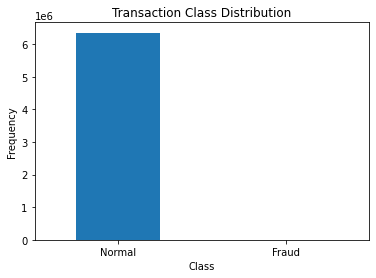

In [281]:
LABELS = ['Normal', 'Fraud']

count_classes = pd.value_counts(data['isFraud'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [282]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [283]:
legit = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]

In [284]:
print(legit.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [285]:
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [286]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

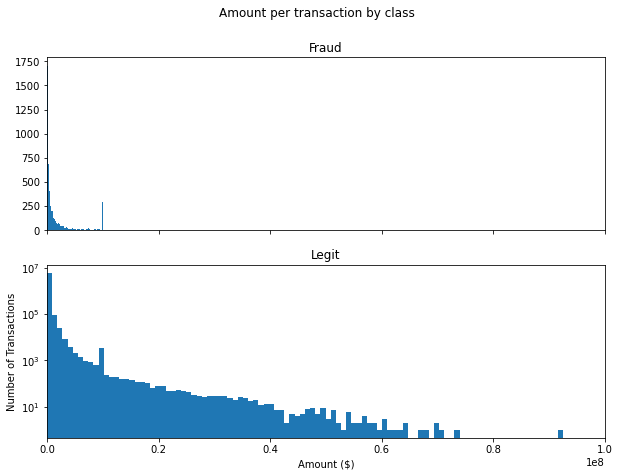

In [287]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
f.suptitle('Amount per transaction by class')
bins = 100
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.amount, bins = bins)
ax2.set_title('Legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 100000000))
plt.yscale('log')
plt.show()

We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation

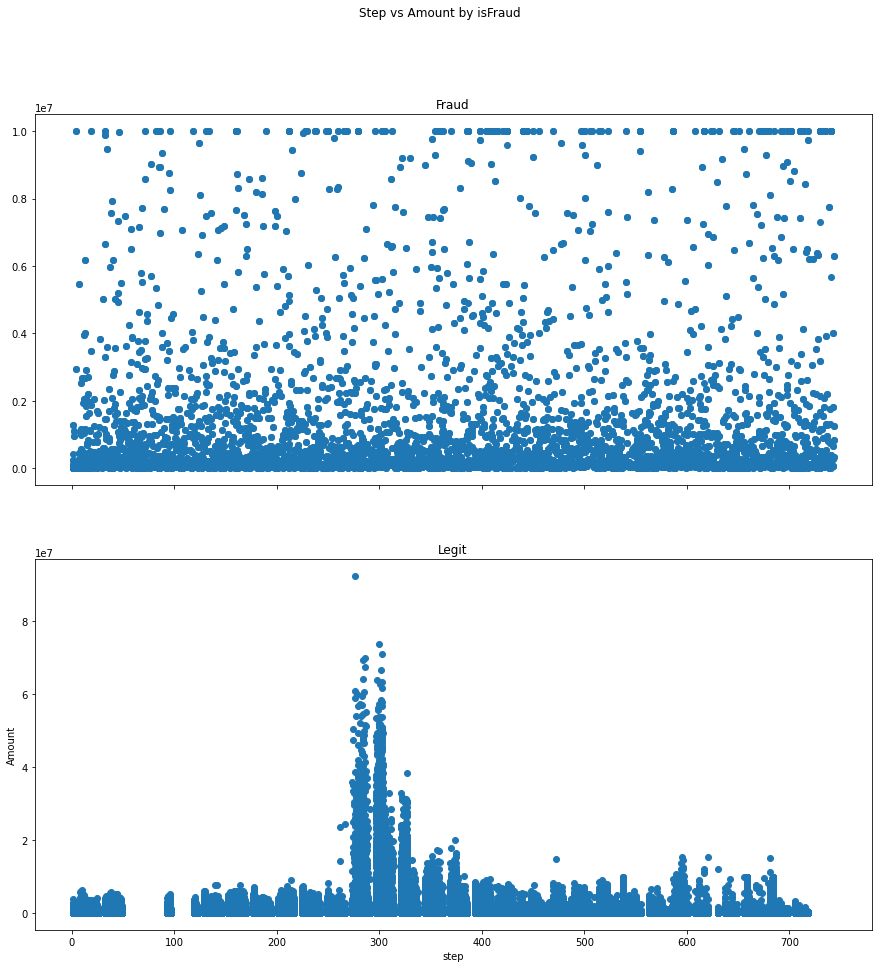

In [288]:
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(15,15), sharex=True)
f.suptitle('Step vs Amount by isFraud')
ax1.scatter(fraud.step, fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(legit.step, legit.amount)
ax2.set_title('Legit')
plt.xlabel('step')
plt.ylabel('Amount')
plt.show()

In [289]:
data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


In [290]:
legit_sample = legit.sample(n=10000)

In [291]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [292]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1792778,162,CASH_OUT,92273.47,C1529197017,52870.0,0.0,C790324177,678421.19,770694.66,0,0
1831215,163,PAYMENT,15260.20,C1447646760,0.0,0.0,M558213250,0.00,0.00,0,0
583498,33,CASH_OUT,125032.15,C1544273705,0.0,0.0,C2070377928,1917114.67,2042146.82,0,0
3405179,255,CASH_OUT,437454.45,C620895616,23710.0,0.0,C409856589,504944.22,942398.68,0,0
4342314,308,PAYMENT,5164.08,C200934024,0.0,0.0,M1540230778,0.00,0.00,0,0


In [293]:
new_dataset['isFraud'].value_counts()

0    10000
1     8213
Name: isFraud, dtype: int64

In [294]:
new_dataset.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
isFraud,,,,,,,
0,244.671000,1.824135e+05,8.200974e+05,842919.746188,1.138284e+06,1.266252e+06,0.000000
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948


Splitting the dataset into features and Targets

In [295]:
x = new_dataset.drop(columns='isFraud', axis=1)
y = new_dataset['isFraud']

In [296]:
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
1792778,162,CASH_OUT,92273.47,C1529197017,52870.0,0.0,C790324177,678421.19,770694.66,0
1831215,163,PAYMENT,15260.20,C1447646760,0.0,0.0,M558213250,0.00,0.00,0
583498,33,CASH_OUT,125032.15,C1544273705,0.0,0.0,C2070377928,1917114.67,2042146.82,0
3405179,255,CASH_OUT,437454.45,C620895616,23710.0,0.0,C409856589,504944.22,942398.68,0
4342314,308,PAYMENT,5164.08,C200934024,0.0,0.0,M1540230778,0.00,0.00,0


In [297]:
y.head()

1792778    0
1831215    0
583498     0
3405179    0
4342314    0
Name: isFraud, dtype: int64

Split the data into training and test data.

In [298]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=10)

In [299]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3642 entries, 6362462 to 6351061
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            3642 non-null   int64  
 1   type            3642 non-null   object 
 2   amount          3642 non-null   float64
 3   nameOrig        3642 non-null   object 
 4   oldbalanceOrg   3642 non-null   float64
 5   newbalanceOrig  3642 non-null   float64
 6   nameDest        3642 non-null   object 
 7   oldbalanceDest  3642 non-null   float64
 8   newbalanceDest  3642 non-null   float64
 9   isFlaggedFraud  3642 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 313.0+ KB


In [300]:
x_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.00,0.00,1
6037833,478,CASH_OUT,829286.58,C63485295,829286.58,0.00,C801090621,178393.69,1007680.27,0
2822983,226,CASH_IN,452009.31,C1252356401,89052.00,541061.31,C1809847991,49715.02,0.00,0
2795238,216,TRANSFER,31358.72,C22557199,31358.72,0.00,C1099497770,0.00,0.00,0
3257999,251,CASH_OUT,345425.57,C1514359401,345425.57,0.00,C648222182,208488.90,553914.47,0


In [301]:
x_train_t = x_train.select_dtypes(exclude=['object'])

Model Training and fiting datapoints into model.

In [302]:
model = LogisticRegression()

In [303]:
model.fit(x_train_t, y_train)

LogisticRegression()

In [304]:
####### predicting Accuracy on Training Data points

x_train_prediction = model.predict(x_train_t)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [305]:
print('Accuracy on Training Data :', training_data_accuracy)

Accuracy on Training Data : 0.9038989566172433


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

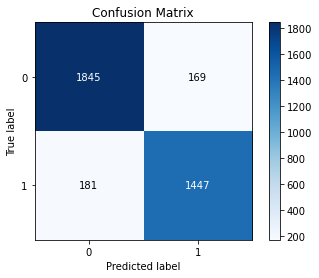

In [306]:
#!pip install scikit-plot

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train, x_train_prediction)

In [307]:
from sklearn.metrics import classification_report

print (classification_report(y_train, x_train_prediction))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2014
           1       0.90      0.89      0.89      1628

    accuracy                           0.90      3642
   macro avg       0.90      0.90      0.90      3642
weighted avg       0.90      0.90      0.90      3642



With the Logistic Regression Model, we have:

The confusion matrix shows 1865+1447 = 3312 correct predictions and 181+149=330 incorrect ones.

True Positives: 1447

True Negatives: 1865

False Positives: 149 (Type I error)

False Negatives: 181 ( Type II error)

the accuracy of model prediction was excellent

Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model.